# State Distribution Example

In this example, we plan to plot the distribution of system states. This helps researchers on serverless computing platforms to debug and test out their performance models with knowledge of system state distribution.

In [1]:
# imports

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pacssim.ServerlessSimulator import ServerlessSimulator as Sim

sim = Sim(arrival_rate=0.9, warm_service_rate=1/2.016, cold_service_rate=1/2.163,
            expiration_threshold=600, max_time=100000)
sim.generate_trace(debug_print=False)
sim.print_trace_results()

Cold Starts / total requests: 	 130 / 89932
Cold Start Probability: 	 0.0014
Average Instance Life Span: 	 6177.7499
Average Server Count:  		 7.7223
Average Running Count:  	 1.8105
Average Idle Count:  		 5.9118


You can define any state representation you want based on the data present in the trace.
Here, we chose to use the number of servers as state.

In [50]:
sim.calculate_time_lengths()

# encode states
hist_states = []
for idx in range(len(sim.hist_server_count)):
    if sim.hist_server_count[idx] == 0:
        hist_states.append((0, 'd'))
    else:
        curr_server_count = sim.hist_server_count[idx]
        prev_server_count = sim.hist_server_count[idx-1]
        if curr_server_count > prev_server_count:
            hist_states.append((curr_server_count, 'u'))
        elif curr_server_count < prev_server_count:
            hist_states.append((curr_server_count, 'd'))
        else: # state hasn't changed
            hist_states.append(hist_states[-1])

vals, probs = sim.calculate_time_average(hist_states)
sim.print_time_average(vals, probs)

Value          Prob
(8, 'd')       0.0760
(3, 'u')       0.0000
(1, 'u')       0.0000
(8, 'u')       0.2856
(7, 'u')       0.1365
(5, 'u')       0.0003
(0, 'd')       0.0000
(7, 'd')       0.2635
(10, 'u')      0.0374
(10, 'd')      0.0000
(4, 'u')       0.0000
(2, 'u')       0.0000
(6, 'd')       0.0546
(6, 'u')       0.0000
(9, 'd')       0.0049
(11, 'u')      0.0060
(9, 'u')       0.1350


Value           Prob
0               0.0000
1               0.0000
2               0.0000
3               0.0000
4               0.0000
5               0.0003
6               0.0546
7               0.4001
8               0.3616
9               0.1399
10              0.0374
11              0.0060


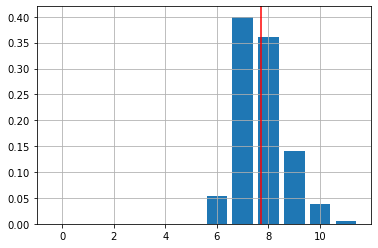

In [51]:
sim.calculate_time_lengths()

unq_vals, val_times = sim.calculate_time_average(sim.hist_server_count)

plt.bar(unq_vals, val_times)
plt.grid(True)
plt.axvline(x=sim.get_average_server_count(), c='r')

sim.print_time_average(unq_vals, val_times)

In [4]:
pd.DataFrame(data = {
    'server_count': unq_vals,
    'Probability': val_times
})

,server_count,Probability
0,6,0.025082
1,7,0.434313
2,8,0.375907
3,9,0.140653
4,10,0.024045
